In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [67]:
import os
path = 'D:\\Python_grass_solution\\MachineLearning\\datasets'
data_path = os.path.join(path,'FuelConsumptionCo2.csv')
co2_data = pd.read_csv(data_path)

In [68]:
co2_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [69]:
X = co2_data.drop('CO2EMISSIONS',axis=1).copy()
y = co2_data['CO2EMISSIONS']

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


In [71]:
X.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
dtype: int64

In [72]:
X.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000


In [73]:
X.corrwith(y)

MODELYEAR                        NaN
ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
dtype: float64

## Removing useless feature

In [74]:
X.drop('MODELYEAR',axis=1,inplace=True)
X.drop('MODEL',axis=1,inplace=True)

In [75]:
X.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


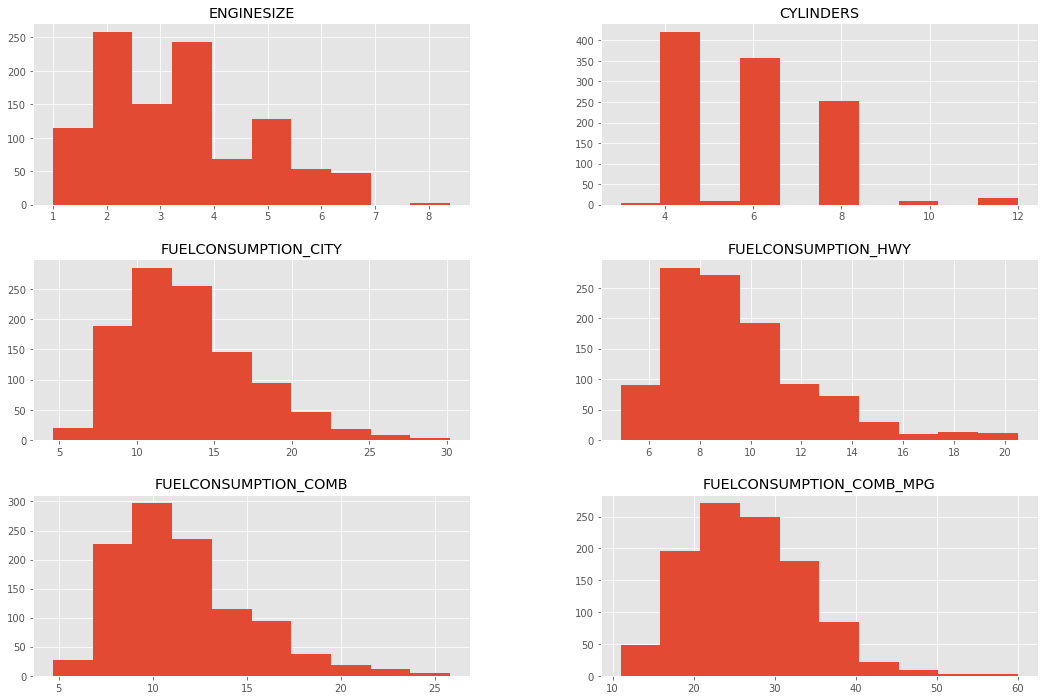

In [55]:
fig = plt.figure(figsize = (18,12))
ax = fig.gca()
X.hist(ax=ax)
plt.show()

<Figure size 1800x1200 with 0 Axes>

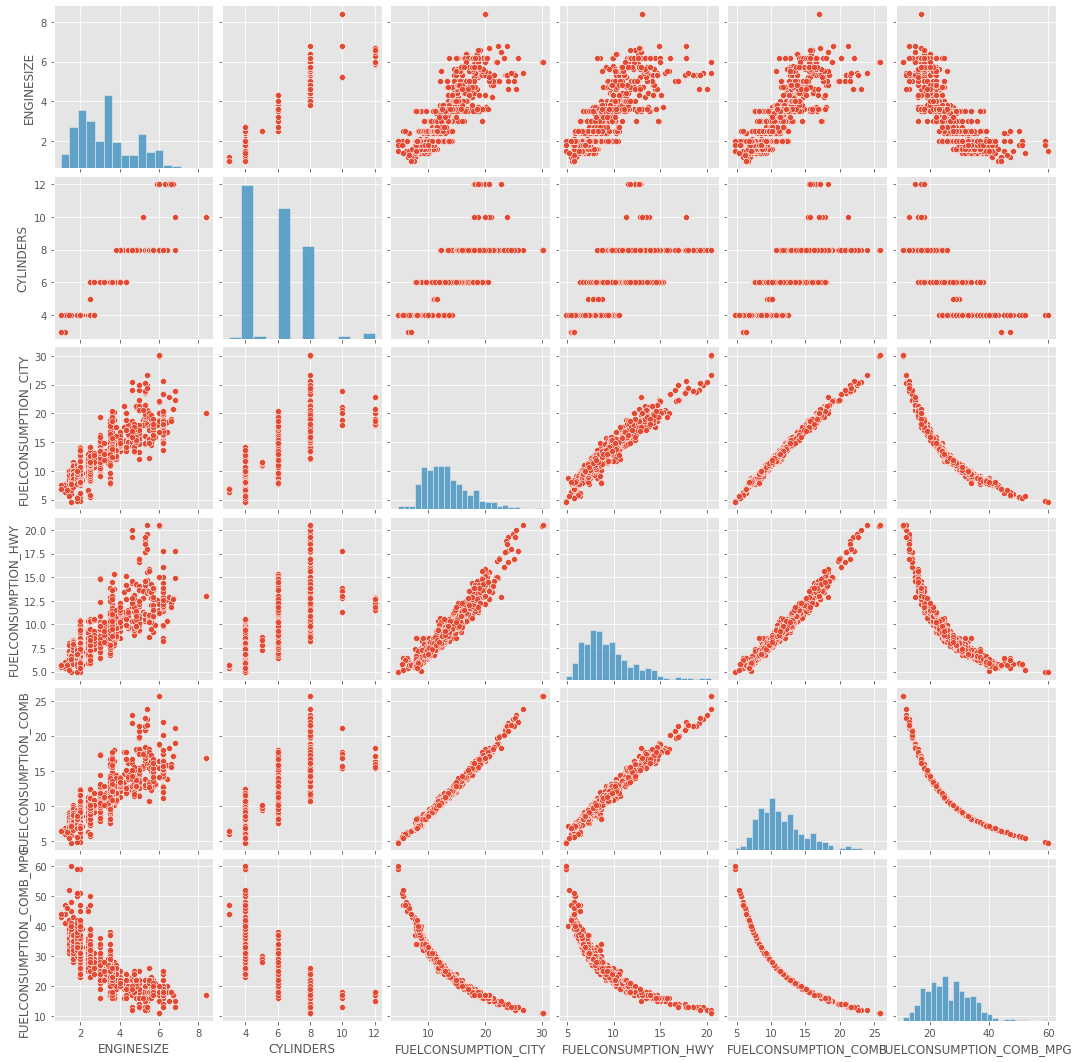

In [56]:
plt.figure(figsize = (18,12),dpi=100)
plt.style.use('ggplot')
sns.pairplot(X)
plt.show()

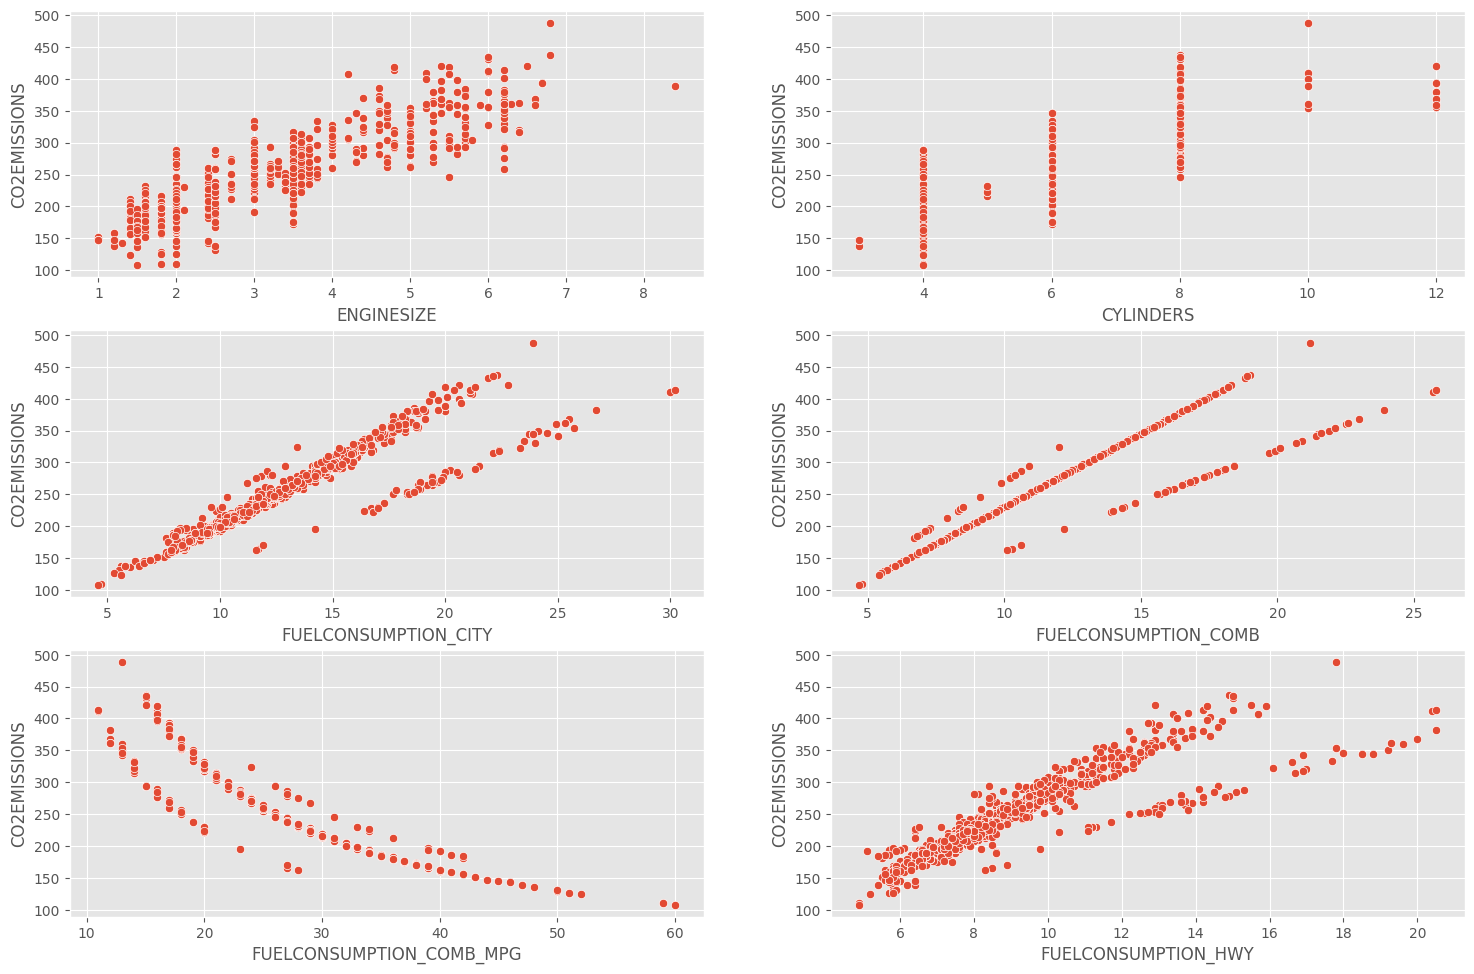

In [57]:
plt.figure(figsize = (18,12),dpi=100)
plt.subplot(3,2,1)
sns.scatterplot(X['ENGINESIZE'],y)
plt.subplot(3,2,2)
sns.scatterplot(X['CYLINDERS'],y)
plt.subplot(3,2,3)
sns.scatterplot(X['FUELCONSUMPTION_CITY'],y)
plt.subplot(3,2,4)
sns.scatterplot(X['FUELCONSUMPTION_COMB'],y)
plt.subplot(3,2,5)
sns.scatterplot(X['FUELCONSUMPTION_COMB_MPG'],y)
plt.subplot(3,2,6)
sns.scatterplot(X['FUELCONSUMPTION_HWY'],y)
plt.show()

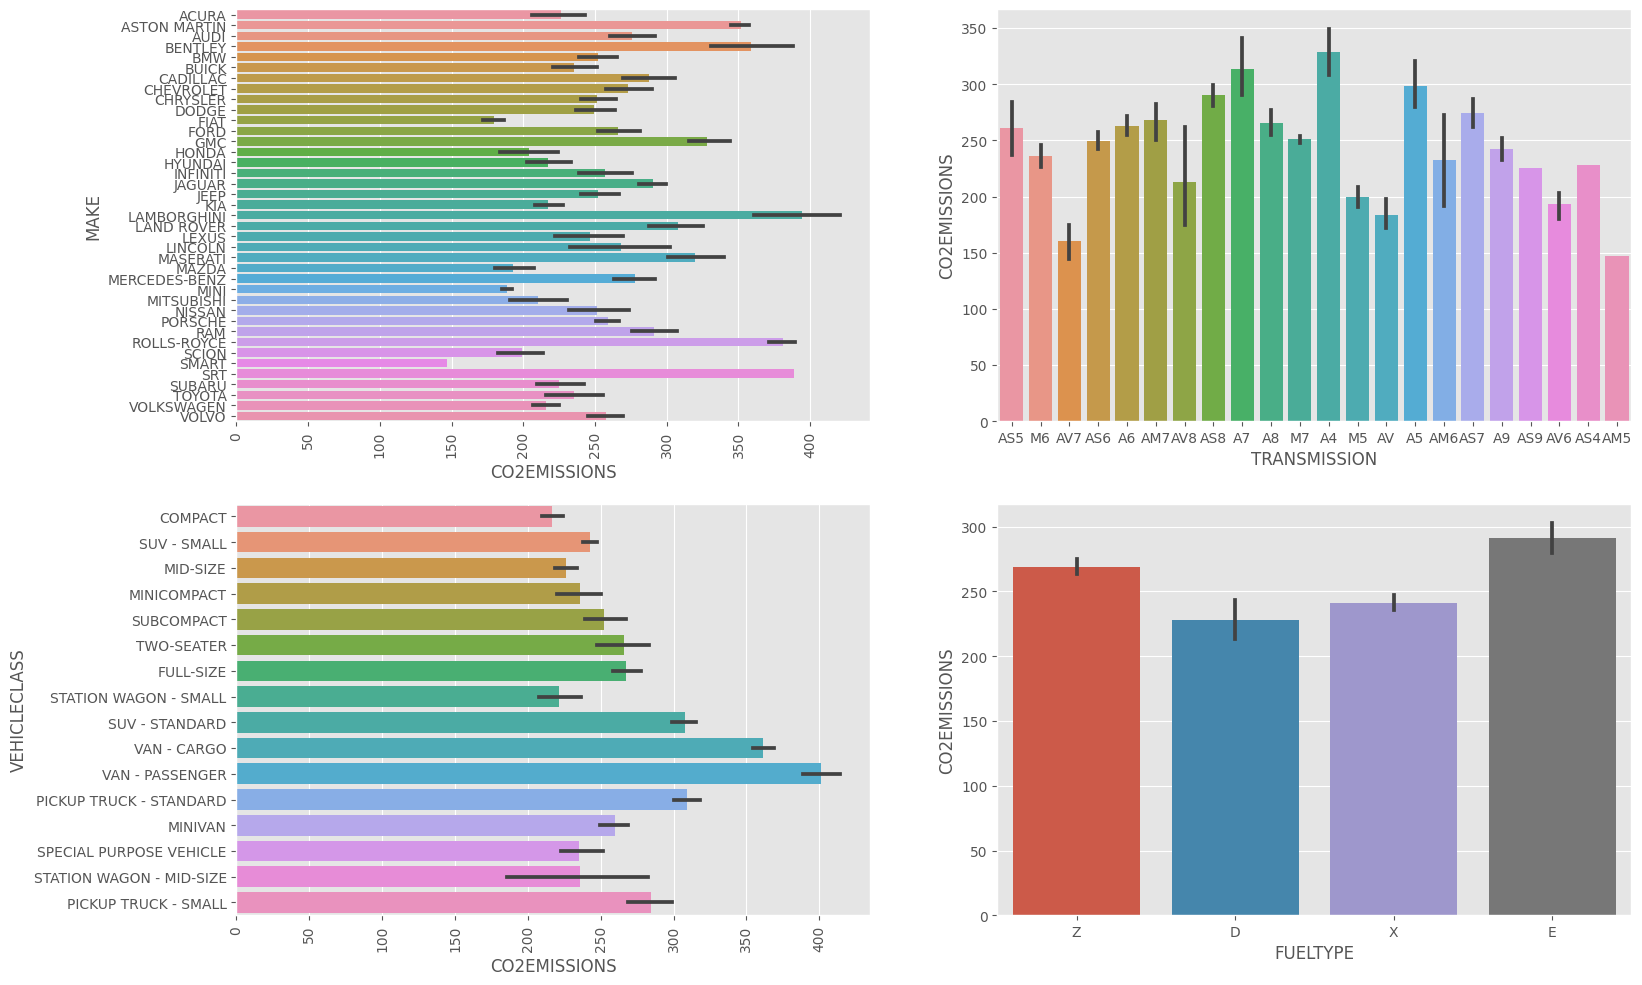

In [58]:
plt.figure(figsize = (18,12),dpi=100)
plt.subplot(2,2,1)
sns.barplot(y,X['MAKE'])
plt.xticks(rotation=90)


plt.subplot(2,2,2)
sns.barplot(X['TRANSMISSION'],y)

plt.subplot(2,2,3)
sns.barplot(y,X['VEHICLECLASS'])
plt.xticks(rotation=90)


plt.subplot(2,2,4)
sns.barplot(X['FUELTYPE'],y)

plt.show()

In [76]:
numerical_features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
                        'FUELCONSUMPTION_COMB_MPG']

categorical_features_nominal = ['MAKE','TRANSMISSION','FUELTYPE']
categorical_features_Ordinal = ['VEHICLECLASS']

## Spliting data randomly

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123)

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
pipeline = ColumnTransformer([
    ('Scaler',StandardScaler(),numerical_features),
    ('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'),categorical_features_nominal),
    ('ordinal',OrdinalEncoder(),categorical_features_Ordinal)
])

In [92]:
X_train_transform = pipeline.fit_transform(X_train)

X_test_transform = pipeline.transform(X_test)

categorical_column = []
for categorical_feature in list(pipeline.named_transformers_['one_hot_encoder'].categories_):
    categorical_column += list(categorical_feature)
    
columns = numerical_features + categorical_column + ['VEHICLECLASS']
X_train_transform = pd.DataFrame(X_train_transform.toarray(), columns=columns)
X_test_transform = pd.DataFrame(X_test_transform.toarray(), columns=columns)

In [93]:
X_train_transform.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,ACURA,ASTON MARTIN,AUDI,BENTLEY,...,YUKON DENALI XL AWD,YUKON XL,YUKON XL 4WD,Z4 sDRIVE28i,Z4 sDRIVE35i,Z4 sDRIVE35is,tC,xB,xD,VEHICLECLASS
0,-0.938101,-0.988088,-0.645828,-0.804439,-0.700824,0.599137,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.233699,0.123837,0.439886,0.500768,0.461444,-0.731758,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
2,1.175104,1.235761,0.753537,0.994630,0.858316,-0.997937,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,-0.585900,-0.988088,-1.176622,-1.263025,-1.211088,1.663852,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.259382,0.123837,-0.042654,-0.063645,-0.048820,-0.199400,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [94]:
X_test_transform.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,ACURA,ASTON MARTIN,AUDI,BENTLEY,...,YUKON DENALI XL AWD,YUKON XL,YUKON XL 4WD,Z4 sDRIVE28i,Z4 sDRIVE35i,Z4 sDRIVE35is,tC,xB,xD,VEHICLECLASS
0,-1.219862,-0.988088,-1.273130,-1.298301,-1.296132,1.796942,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.118501,0.123837,0.512267,0.536044,0.518140,-0.731758,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,-0.233699,0.123837,0.343378,0.042182,0.234660,-0.465579,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.893343,1.235761,0.439886,0.289113,0.376400,-0.598669,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.188941,0.123837,0.898299,0.606596,0.801620,-0.864848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y,y_hat):
    return np.sqrt(mean_squared_error(y,y_hat))

def model_report(models,X_train,X_test,y_train,y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.4f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.4f}")
        print()
        print(f"Training Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Test     Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')
       

In [96]:
from sklearn.linear_model import Ridge,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = [
        ('Ridge Regression', Ridge()),
        ('SGD Regressor', SGDRegressor()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Support Vector Machines', SVR()),
        ('Random Forest', RandomForestRegressor()),
        ('K-Nearest Neighbors', KNeighborsRegressor())
    ]

model_report(models,X_train_transform,X_test_transform,y_train,y_test)

________________________________________________________________________________
                          Report For Ridge Regression                           

Training RMSE Error: 3.8747
Test     RMSE Error: 6.0482

Training Accuracy: 1.00
Test     Accuracy: 0.99



________________________________________________________________________________
                            Report For SGD Regressor                            

Training RMSE Error: 5.2956
Test     RMSE Error: 6.6465

Training Accuracy: 0.99
Test     Accuracy: 0.99



________________________________________________________________________________
                            Report For Decision Tree                            

Training RMSE Error: 0.0000
Test     RMSE Error: 9.2332

Training Accuracy: 1.00
Test     Accuracy: 0.98



________________________________________________________________________________
                       Report For Support Vector Machines                       

Training RMSE Error: 34.

In [97]:
from sklearn.model_selection import cross_val_score
for name, model in models:
    print(name)
    val_scores = cross_val_score(model,X_train_transform,y_train,cv=5,scoring='r2')
    print(val_scores)
    print('mean : ',val_scores.mean())
    print('std : ',val_scores.std())
    print('\n\n','_'*100)

Ridge Regression
[0.98716376 0.98784975 0.98721272 0.99106148 0.99228191]
mean :  0.9891139238969485
std :  0.0021375203415273515


 ____________________________________________________________________________________________________
SGD Regressor
[0.97993446 0.98695043 0.98391874 0.98895924 0.99064219]
mean :  0.9860810117415723
std :  0.0038026290696040643


 ____________________________________________________________________________________________________
Decision Tree
[0.98133823 0.98861388 0.94995052 0.99734778 0.99795611]
mean :  0.98304130470483
std :  0.017641319449500502


 ____________________________________________________________________________________________________
Support Vector Machines
[0.63726544 0.60333244 0.63182331 0.65198742 0.60858323]
mean :  0.6265983677017105
std :  0.018174373842322837


 ____________________________________________________________________________________________________
Random Forest
[0.98663875 0.98996699 0.97366148 0.99753664 0.995855

In [98]:
from sklearn.model_selection import cross_val_score
for name, model in models:
    print(name)
    val_scores = cross_val_score(model,X_train_transform,y_train,cv=5,scoring='neg_mean_squared_error')
    val_scores = np.sqrt(-val_scores)
    print(val_scores)
    print('mean : ',val_scores.mean())
    print('std : ',val_scores.std())
    print('\n\n','_'*100)

Ridge Regression
[6.89967435 7.14163279 6.96957693 5.84957274 6.09423737]
mean :  6.590938836373146
std :  0.5173556390443436


 ____________________________________________________________________________________________________
SGD Regressor
[9.06905201 7.45292906 8.3934922  6.30179994 7.97002481]
mean :  7.83745960512046
std :  0.9327035957830309


 ____________________________________________________________________________________________________
Decision Tree
[ 9.22937086  6.40951413 14.5604206   3.7361509   3.57359598]
mean :  7.501810493314297
std :  4.089318139363984


 ____________________________________________________________________________________________________
Support Vector Machines
[36.67787415 40.80545647 37.39774908 36.49965875 43.39944471]
mean :  38.95603663174673
std :  2.7135329660550176


 ____________________________________________________________________________________________________
Random Forest
[7.05046106 6.46933025 9.90487835 2.92303438 4.7998587 ]


In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = [
    {
        'n_estimators': [ 100, 150,200,300],
        'max_depth': [ 25,27, 30,25,40],
        'max_features': [10,11,12,13,14],
    }, 
    
]

In [101]:
forest = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest,param_grid,cv=5,scoring='r2',return_train_score=True)

In [32]:
grid_search.fit(X_train_transform, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [25, 27, 30, 25, 40],
                          'max_features': [10, 11, 12, 13, 14],
                          'n_estimators': [100, 150, 200, 300]}],
             return_train_score=True, scoring='r2')

In [33]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 13, 'n_estimators': 300}

In [34]:
grid_search.best_score_

0.9875553935835548

In [40]:
result = grid_search.cv_results_



train_scores = np.round(result['mean_train_score'], 2)
test_scores  = np.round(result['mean_test_score'], 2)
parameters = result['params']


scores = [ (tr, ts, pr) for tr, ts, pr in zip(train_scores, test_scores, parameters) ]

scores.sort(key=lambda x:x[1], reverse=True)

strformat = "|{:<5}|{:^20}| {:^20}| {}|\n{}\n"
lb =  '_'*110
print(strformat.format("", "Training Score", "Test Score", "Parameters", lb))
models = [
        ('Random Forest', RandomForestRegressor()),
       
        ]
for ix, (tr, ts, pr) in enumerate(scores):
    print(strformat.format(ix+1, tr, ts, pr, lb))
 

    model_report(models,X_train_transform,X_test_transform,y_train,y_test)

|     |   Training Score   |      Test Score     | Parameters|
______________________________________________________________________________________________________________

|1    |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 10, 'n_estimators': 100}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.8611
Test     RMSE Error: 6.9527

Training Accuracy: 1.00
Test     Accuracy: 0.99



|2    |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 10, 'n_estimators': 150}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                           

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.7349
Test     RMSE Error: 6.9919

Training Accuracy: 1.00
Test     Accuracy: 0.99



|18   |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 14, 'n_estimators': 200}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.7186
Test     RMSE Error: 6.8254

Training Accuracy: 1.00
Test     Accuracy: 0.99



|19   |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 14, 'n_estimators': 300}|
______________________________________________________________________________________________________________

____________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.6883
Test     RMSE Error: 6.6634

Training Accuracy: 1.00
Test     Accuracy: 0.99



|35   |        1.0         |         0.99        | {'max_depth': 27, 'max_features': 13, 'n_estimators': 300}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.6554
Test     RMSE Error: 6.7107

Training Accuracy: 1.00
Test     Accuracy: 0.99



|36   |        1.0         |         0.99        | {'max_depth': 27, 'max_features': 14, 'n_estimators': 100}|
______________________________________________________________________________________________________________

____________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.8571
Test     RMSE Error: 6.8018

Training Accuracy: 1.00
Test     Accuracy: 0.99



|52   |        1.0         |         0.99        | {'max_depth': 30, 'max_features': 13, 'n_estimators': 150}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.9023
Test     RMSE Error: 6.7732

Training Accuracy: 1.00
Test     Accuracy: 0.99



|53   |        1.0         |         0.99        | {'max_depth': 30, 'max_features': 13, 'n_estimators': 200}|
______________________________________________________________________________________________________________

____________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.6468
Test     RMSE Error: 6.7584

Training Accuracy: 1.00
Test     Accuracy: 0.99



|69   |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 12, 'n_estimators': 200}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.5448
Test     RMSE Error: 6.6771

Training Accuracy: 1.00
Test     Accuracy: 0.99



|70   |        1.0         |         0.99        | {'max_depth': 25, 'max_features': 12, 'n_estimators': 300}|
______________________________________________________________________________________________________________

____________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.8624
Test     RMSE Error: 6.9989

Training Accuracy: 1.00
Test     Accuracy: 0.99



|86   |        1.0         |         0.99        | {'max_depth': 40, 'max_features': 12, 'n_estimators': 100}|
______________________________________________________________________________________________________________

________________________________________________________________________________
                            Report For Random Forest                            

Training RMSE Error: 1.7539
Test     RMSE Error: 6.5222

Training Accuracy: 1.00
Test     Accuracy: 0.99



|87   |        1.0         |         0.99        | {'max_depth': 40, 'max_features': 12, 'n_estimators': 200}|
______________________________________________________________________________________________________________

____________